## TOVsolver module guide

TOV solver part we have multiple function, we can generate a Mass radius function from 'Test_EOS.csv' file here easily

Mass Radius file will be generated and stored as  2-d array. The first column is Radius, second one is mass


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


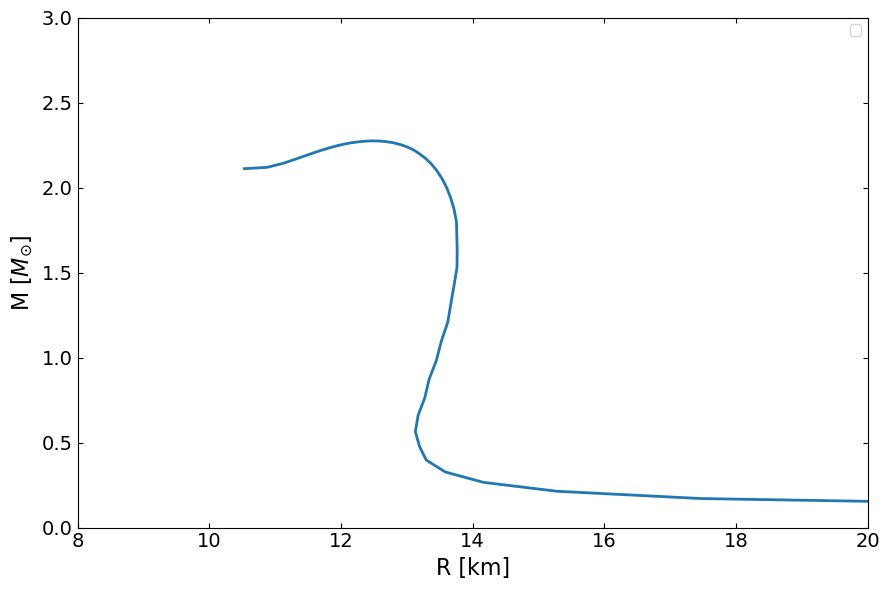

In [1]:
import TOVsolver.main as main
import TOVsolver.EoS_import as EoS_import
from matplotlib import pyplot
import matplotlib.pyplot as plt
import TOVsolver.constant
from itertools import repeat
import numpy
# Main has two functions
#   Output.MRT() returns the mass, radius, tidal
#   OutputC_s() returns the speed of sound
# Using the main functions with either arrays of density and pressure or a .csv with density and pressure columns
#   Function argument is either (filename = ) OR (density = , pressure = )
#   Example: main.OutputMR(filename = 'file.csv') OR main.OutputMR(density = array1, pressure = array2)
MR = main.OutputMR("Test_EOS.csv").T
# Plot the Mass-Radius curve
fig, ax = plt.subplots(1,1, figsize=(9,6))
ax.plot(MR[0], MR[1],lw=2)
ax.set_ylabel(r'M [$M_{\odot}$]', fontsize=16)
ax.set_xlabel('R [km]', fontsize=16)
ax.set_xlim(8., 20.)
ax.set_ylim(0,3)
ax.legend()
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
fig.tight_layout()
plt.show()



We can generate the tidal property from it also,like tidal deformability

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mass Radius and tidal will be generated as the 3-d array. The first column is Radius, second one is mass,last is tidal


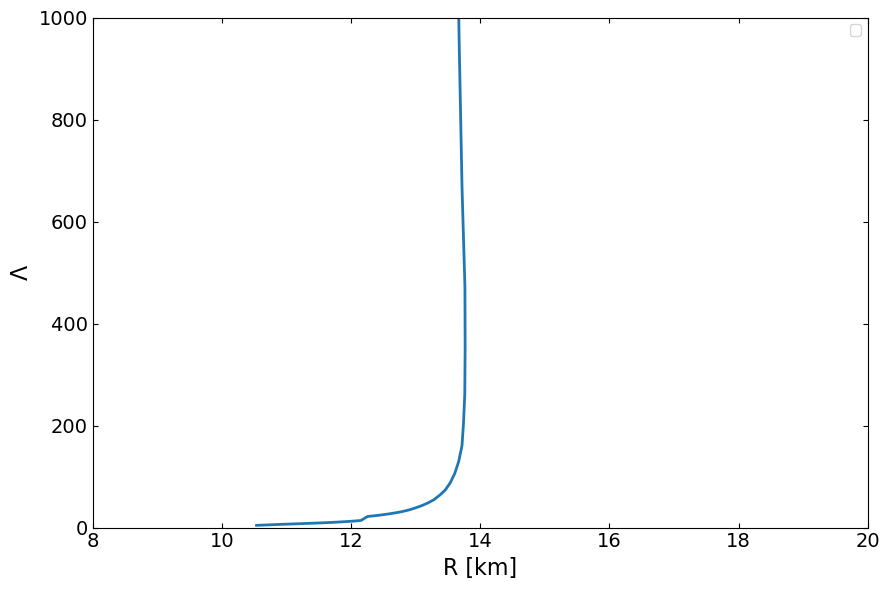

In [4]:
# try solve tidal property
MRT = main.OutputMRT("Test_EOS.csv").T
# Plot the Radius and Tidal curve

fig, ax = plt.subplots(1,1, figsize=(9,6))
        
ax.plot(MRT[0], MRT[2],lw=2)
ax.set_ylabel(r'$\Lambda$', fontsize=16)
ax.set_xlabel('R [km]', fontsize=16)
ax.set_xlim(8., 20.)
ax.set_ylim(0,1000)
ax.legend()
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
fig.tight_layout()
plt.show()

Plot out Tidal with mass

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


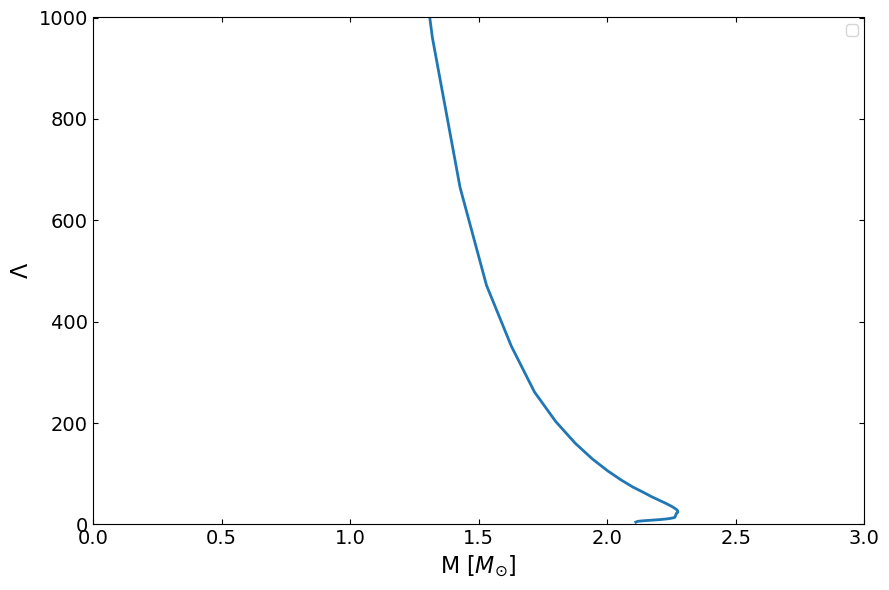

In [5]:
# Plot the Mass and Tidal curve
fig, ax = plt.subplots(1,1, figsize=(9,6))
ax.plot(MRT[1], MRT[2],lw=2)
ax.set_ylabel(r'$\Lambda$', fontsize=16)
ax.set_xlabel(r'M [$M_{\odot}$]', fontsize=16)
ax.set_xlim(0., 3.)
ax.set_ylim(0,1000)
ax.legend()
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
fig.tight_layout()
plt.show()

Can generate the speed of sound from the given equation of state. This do not need to solve TOV equation, the speed of sound is defined by the derivative of P(rho) curve, this quantity is very of interest, since whether there is a upper limit of this speed of sound (except for the casaulity limit c_s < 1 ) is a very interesting and hot topic

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


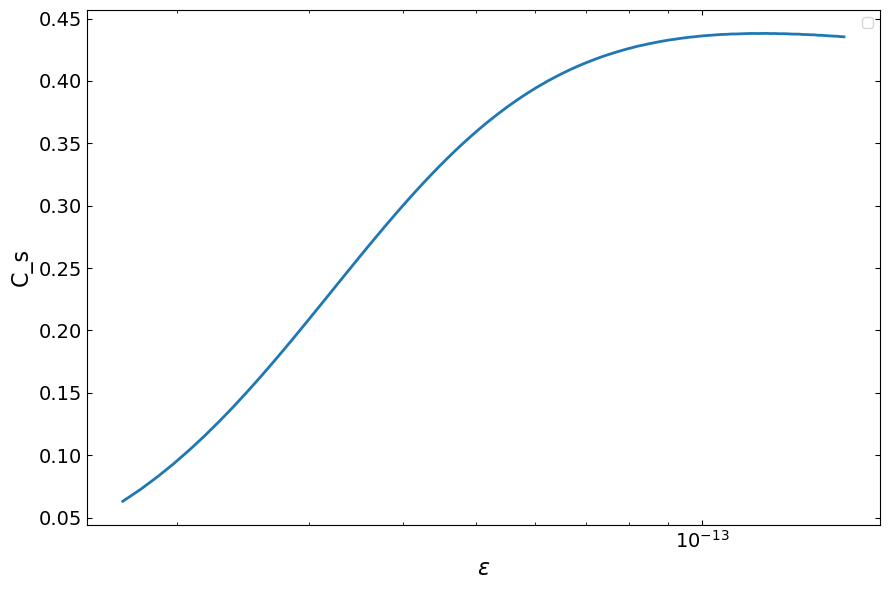

In [2]:

from TOVsolver.constant import c,G 
# here we plotting out speed of sound with Test_EOS, the density is in g/cm3
C_s,rho = main.OutputC_s("Test_EOS.csv")

fig, ax = plt.subplots(1,1, figsize=(9,6))
ax.plot(rho, C_s,lw=2)
ax.set_xlabel(r'$\epsilon$', fontsize=16)
ax.set_ylabel(r'C_s', fontsize=16)
plt.xscale("log")
ax.legend()
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=14)
fig.tight_layout()
plt.show()

This package can easily integrated into a Baysian inference flow, to do bayesian inference, Here, we generated several (50) EoSs from RMF model, and try to use a loop to compute out all of their MRT property. That could be a in-between step of doing bayesian inference of neutron star EoS. Remember these EoS could also be polytrope, or anything that generate from your own EoS computation code. Next step for us will be integrate our EoS computation into this package and also the Bayesian analysis.